<a href="https://colab.research.google.com/github/ismael-almazan/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/Practica25_263177.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Autonoma de Ciudad Juarez

Maestría en Inteligencia Artificial y Analítica de Datos

Programación para Analítica Descriptiva y Predictiva

Ismael Almazan Luna

24 de octubre de 2025

** Regresión lineal con datos categóricos: Costos, Localidades y Salarios**

📌 Objetivos de la Práctica:
Al finalizar esta práctica, los estudiantes serán capaces de:

- Codificar variables categóricas usando one-hot encoding con K-1 para problemas de regresión
- Realizar AED
- Construir un modelo de regresión con variables dummy
- Interpretar los resultados de los coeficientes
- Analizar los resultados de los errores residuales
- Calcular el desempeño del modelo de regresión.

Problema: Se podría argumentar que el salario está relacionado con el costo de la educación. Por lo tanto, para analizar este argumentos veremos qué sucede cuando usamos las variables independientes cost y location.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Mounted at /content/drive


# 1. Carga de datos

Carga el conjunto de datos college.csv, que está en campus virtual, en un dataframe. Elige de este conjunto las columnas salary (variable dependiente), cost(variable independiente - numérica) y location (variable independiente categórica).

Realiza lo siguiente:

*   Convierte si es necesario la variable location a tipo de dato categórico
*   Usa la instrucción describe() en las variables salary y cost
* Cuenta la cantidad de datos que hay por categoría en location
* Convierte la variable location usando one-hot encoding



In [4]:
#Importar de dataset
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/college.csv', usecols=['salary','cost','location'])
df.head()
df.info()

#Cnvertir location a categorica
df['location'] = df['location'].astype('category')
df.info()

#Descripcion de salary y cost
print("\n Salario",df['salary'].describe())
print("\n Costo",df['salary'].describe())

#Valores unicos  de location
print('\n Valores unicos de Location', df['location'].unique())

#Convierte la variable location usando one-hot encoding
encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_data = encoder.fit_transform(df[['location']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['location']))
print(encoded_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   salary    85 non-null     int64 
 1   cost      85 non-null     int64 
 2   location  85 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   salary    85 non-null     int64   
 1   cost      85 non-null     int64   
 2   location  85 non-null     category
dtypes: category(1), int64(2)
memory usage: 1.7 KB

 Salario count        85.000000
mean      95898.823529
std       11937.121912
min       74900.000000
25%       87100.000000
50%       93200.000000
75%      105000.000000
max      123000.000000
Name: salary, dtype: float64

 Costo count        85.000000
mean      95898.823529
std       11937.121912
min  

# 2. Análisis Exploratorio de los Datos

Realiza un análisis exploratorio de los datos y discute lo que observas en cada gráfica.


*   Crea un histograma de la columna salary. Discute lo que observas
* Crea un diagrama de dispersión de salary vs cost, considerando lo siguiente: para cada punto elegirás un color que represente la localidad en la que está el salario y el costo de la educación. Por lo tanto el diagrama de dispersión debería tener puntos en 4 colores distintos. Discute lo que observas
* Emplea un boxplot para saber si hay diferencias en los costos según la ubicación, es decir, con boxplot deberás analizar la distribución de cost por localidad. Discute lo que observas

============================================================================

* Se observa que mayor parte de los salarios estan concentrados entre 80,000 y 100,000. El histograma muestra un liego sesgo del lazo izquierdo.
* Al analizar los salarios vs los costos por ubicacion se observa que las ubicaciones NE y S se asocian con valores mas altos tanto en salario como en costo, por otro lado las ubicaciones MW y W presentan una mayor dispersion o variabilidad, y W la que predomina en salarios mas bajos
* El diagrama de caja muestra como las ubicaciones MW, NE y S tienen distribuciones de costo similares en terminos de la mediana (aprox. 165,000), siendo NE la ubicacion con menos dispersion en los costos. Para el caso de W se diferencia por tener una mediana notablemente mas baja,(aprox. 90,000) aunque con rango de costos muy grande. NE es la unica ubicaccion donde se tienen valores atipicos, sitiendoce en el extremo inferior.



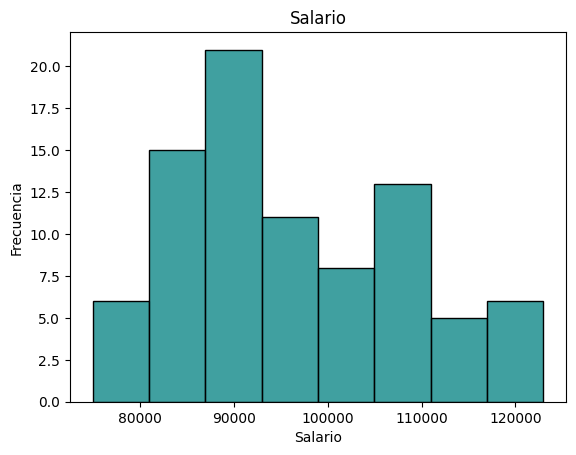

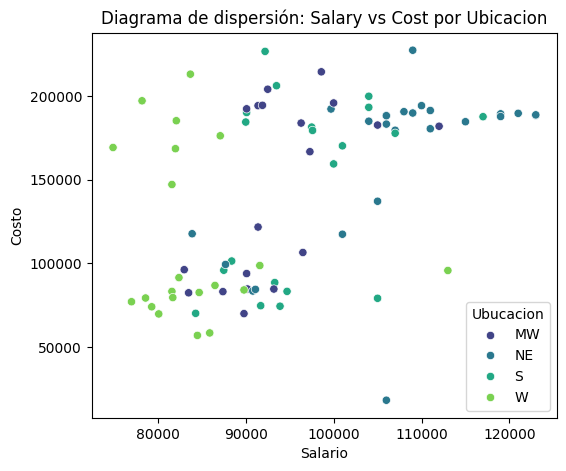

/tmp/ipython-input-3557930706.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='location',y='cost', palette='viridis')


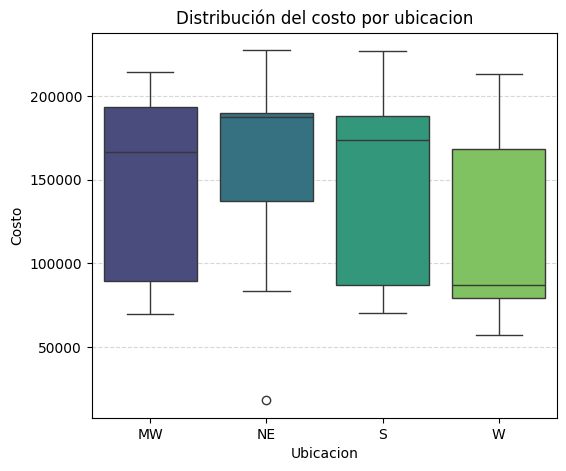

In [8]:
#Histograma de salry
sns.histplot(df['salary'],color='teal')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Salario')
plt.show()
print('\n')

#Crea un diagrama de dispersión de salary vs cost
plt.figure(figsize=(6,5))
sns.scatterplot(df, x='salary',y='cost', hue='location', palette='viridis')
plt.title('Diagrama de dispersión: Salary vs Cost por Ubicacion')
plt.xlabel('Salario')
plt.ylabel('Costo')
plt.legend(title='Ubucacion')
plt.show()

#Boxplor de costos segun ubicacion
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='location',y='cost', palette='viridis')
plt.title('Distribución del costo por ubicacion')
plt.xlabel('Ubicacion')
plt.ylabel('Costo')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


# 3. Construcción del modelo de regresión

- Construye el modelo de regresión usando los datos de salario, costo y location. Recuerda que esta última debe ser en su versión codificada con one-hot encoding.
- Imprime los coeficientes e interpreta qué significan cuando se sustituyen valores en costo, y location (versión codificada). Si no recuerdas cómo se hace esta interpretación consulta los videos.

==================================================================================
* El interceto representa el salario promdio de MW, asumiento que el costo es cero y las ubicaciones NE,S y W tambien es cual es de 85,000 aproximadamente.
* El coeficiente de costo es positivo, lo cual indica que un efecto positivo, incremento de una unidad de costo esta asociado con 0.06 en el salario.
* Para NE se encontro que el salario es de 97,000 (85,000+12,000 del coeficiente)
* Para S se encontro que el salario promedio es de 87,800.
* y para W el coeficiente es negativo, lo cual indica que el salario es el intercepto menos el coeficiente 85,000 - 7700 = 77,300 aproximadamente.

Siendo en NE donde en promedio los salarios son mayorees, y el W donde los salarios en promeido son los mas bajos

In [9]:
#Modelo d regresion
from sklearn.linear_model import LinearRegression

X = pd.concat( [df[['cost']], encoded_df[['location_NE', 'location_S', 'location_W']]], axis=1)
y=df['salary']

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_})

print("Intercepto:", modelo.intercept_)
print("\nCoeficientes:")
print(coeficientes)

Intercepto: 84988.71622754404

Coeficientes:
      Variable   Coeficiente
0         cost      0.060518
1  location_NE  12032.819692
2   location_S   2800.345026
3   location_W  -7721.420103


# 4. Análisis de Residuos

- Construyen una visualización de predicciones (salario estimado) vs valores reales (salario real).
- Crea una gráfica de los errores residuales. Discute lo que observas

==================================================================================
* La mayoria de los puntos de datos se agrupan cerca de la linea roja, lo que indica que el modelo tiene una capacidad razonable para predecir el Salario.
* En resumen, el modelo de regresion parece capturar la tendencia general, pero tiene margen de mejora, especialmente en los extremos del rango salarial.
* En cuanto a la distribucion de los errores, el histograma muestra una distribucion que visualmente se aproxima  a la normal(media cerca de cero), teniendo solamente algunos datos atitipos o en parte de niveles mas altos de salario.

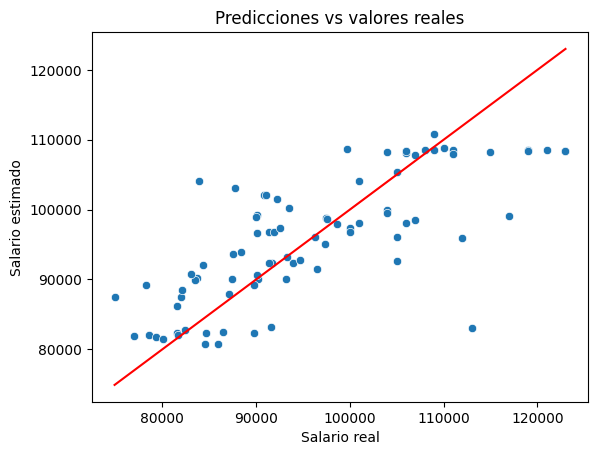

Text(0.5, 1.0, 'Histograma de Errores residuales')

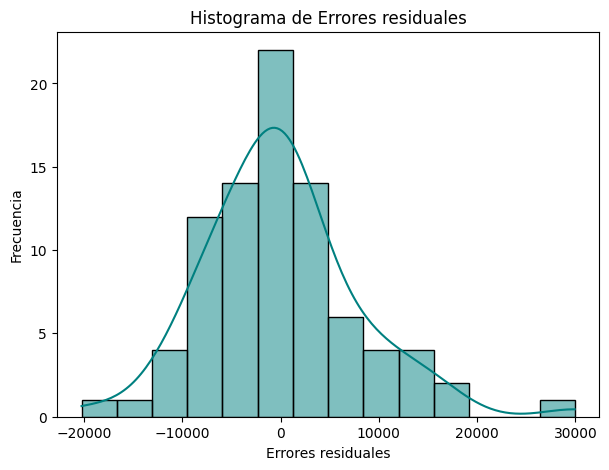

In [12]:
#Salario estimado vs salrio real
sns.scatterplot(x=y, y=y_pred)
sns.lineplot(x=y, y=y, color='red')
plt.xlabel('Salario real')
plt.ylabel('Salario estimado')
plt.title('Predicciones vs valores reales')
plt.show()

residuals = y - y_pred
#Histograma de los residuos
plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, color='teal')
plt.xlabel("Errores residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de Errores residuales")

# 5. Evalúa el modelo

- Calcula el MSE del modelo construido. Recuerda que usas el propio conjunto de datos (No hablamos nada de entrenamiento y test).
- Calcula el R² Score

Discute estos resultados obtenidos.

==================================================================================
* El MSE represenrta la magnitud primedio del errror de prediccion elevado al cuadrado, para su interpretacion se toma la raiz cuadrada, lo cual indica que las predicciones de salario del modelo se devian de los salarios reales aproximadamente 7,776.
* El r^2 indica la proporcion de la varianza total del salario que es explicada por el costo y la ubicacion, en coeficiente es de 0.5705, lo que significa que aproximadamente el 57.05% de la variacion de salario a atribuido a efectos de costo y la ubicacion. y el resto 42% a factores que no estan incuidos en el modelo.

In [13]:
from sklearn.metrics import mean_squared_error
#MSE
mse = mean_squared_error(y, y_pred)
print("MSE=", mse)

#R2 score
r2 = modelo.score(X, y)
print("R^2=", r2)


MSE= 60480269.14657189
R^2= 0.5705089716684086


# 6. Realiza un análisis de varianza con stastmodel

Consulta esto aquí https://www.statsmodels.org/dev/examples/notebooks/generated/variance_components.html

In [19]:
#analisis de varianza con statsmodel
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import VCSpec
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm


modelo = sm.OLS(y, X).fit()

# ANOVA
anova_resultado = modelo.summary().tables[1]
print(anova_resultado)

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.499e+04   3092.655     27.481      0.000    7.88e+04    9.11e+04
cost            0.0605      0.017      3.501      0.001       0.026       0.095
location_NE  1.203e+04   2462.189      4.887      0.000    7132.908    1.69e+04
location_S   2800.3450   2568.410      1.090      0.279   -2310.954    7911.644
location_W  -7721.4201   2593.352     -2.977      0.004   -1.29e+04   -2560.484
